In [ ]:
# Importing Libraries
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')


# Importing tensorflow and keras
import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Importing the Embedding Layer
from keras.layers import Embedding

embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

custom-trained embedding layer with training sample size = 100

In [ ]:
features = 10000 # No. of words considered as features
length = 150 # cutting off the text upto text 150 words

# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)
x_train = x_train[:100]
y_train = y_train[:100]

# Preprocessing the data
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Building the model
model1 = Sequential()
model1.add(Embedding(10000, 8, input_length=length))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

# Compiling the model
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the neural network model
history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 4s 515ms/step - loss: 0.6956 - acc: 0.4875 - val_loss: 0.6897 - val_acc: 0.5500
Epoch 2/10
3/3 [==============================] - 0s 57ms/step - loss: 0.6718 - acc: 0.8250 - val_loss: 0.6892 - val_acc: 0.6000
Epoch 3/10
3/3 [==============================] - 0s 92ms/step - loss: 0.6542 - acc: 0.9750 - val_loss: 0.6886 - val_acc: 0.6500
Epoch 4/10
3/3 [==============================] - 0s 57ms/step - loss: 0.6385 - acc: 0.9875 - val_loss: 0.6879 - val_acc: 0.6500
Epoch 5/10
3/3 [==============================] - 0s 92ms/step - loss: 0.6231 - acc: 0.9875 - val_loss: 0.6872 - val_acc: 0.6500
Epoch 6/10
3/3 [==============================] - 0s 80ms/step - loss: 0.6078 - acc: 0.9875 - val_loss: 0.6872 - val_acc: 0.6500
Epoch 7/10
3/3 [==============================] - 0s 73ms/step - loss: 0.5920 - acc: 0.9875 - val_loss: 0.6868 - val_acc: 0.6500
Epoch 8/10
3/3 [==============================] - 0s 39ms/step - loss: 0.5760 - acc: 1.0000 - va

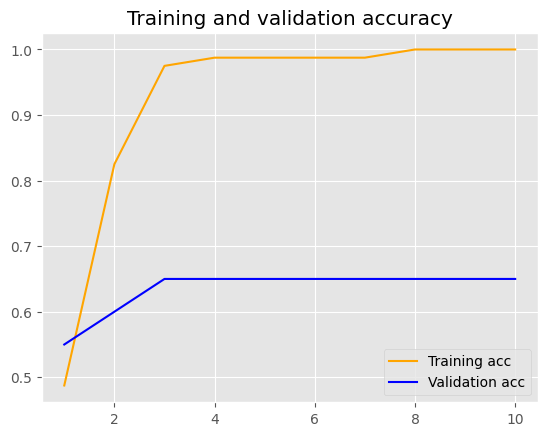

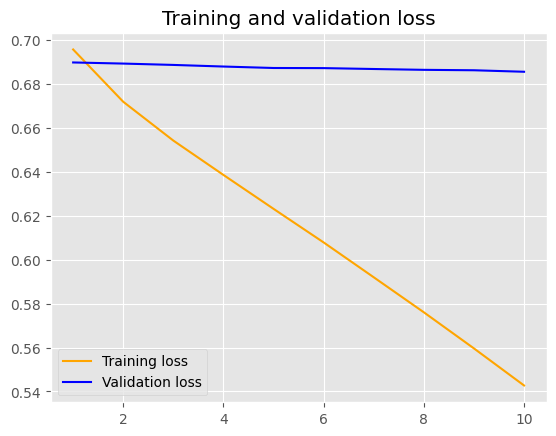

In [ ]:
# Displaying accuracy and loss curves
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "orange", label = "Training acc")
plt.plot(epochs, validation_accuracy, "blue", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "orange", label = "Training loss")
plt.plot(epochs, validation_loss, "blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
#Evaluating training model on test data
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 3s 4ms/step - loss: 0.6939 - acc: 0.4992
Test loss: 0.693871021270752
Test accuracy: 0.4991599917411804


custom-trained embedding layer with training sample size = 5000

In [ ]:
features = 10000 # No. of words considered as features
length = 150 # cutting off the text upto text 150 words

# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Preprocessing the data
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combining text and labels
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

# Reducing training data to 5000 samples
x_train = x_train[:5000]
y_train = y_train[:5000]

# Initializing the model and adding the layers
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

# Compiling the model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the NN model
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6911 - acc: 0.5272 - val_loss: 0.6860 - val_acc: 0.5880
Epoch 2/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6587 - acc: 0.7467 - val_loss: 0.6537 - val_acc: 0.7110
Epoch 3/10
125/125 [==============================] - 0s 4ms/step - loss: 0.5778 - acc: 0.8445 - val_loss: 0.5789 - val_acc: 0.7590
Epoch 4/10
125/125 [==============================] - 0s 4ms/step - loss: 0.4620 - acc: 0.8700 - val_loss: 0.5013 - val_acc: 0.8000
Epoch 5/10
125/125 [==============================] - 0s 4ms/step - loss: 0.3577 - acc: 0.9028 - val_loss: 0.4452 - val_acc: 0.8190
Epoch 6/10
125/125 [==============================] - 0s 4ms/step - loss: 0.2794 - acc: 0.9260 - val_loss: 0.4137 - val_acc: 0.8310
Epoch 7/10
125/125 [==============================] - 0s 4ms/step - loss: 0.2217 - acc: 0.9442 - val_loss: 0.3935 - val_acc: 0.8370
Epoch 8/10
125/125 [==============================] - 1s 4ms/step - loss: 0.

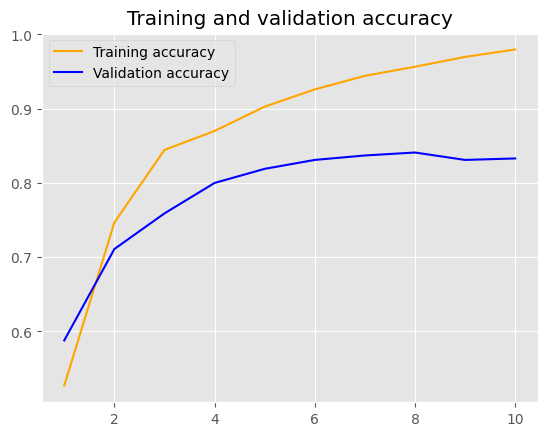

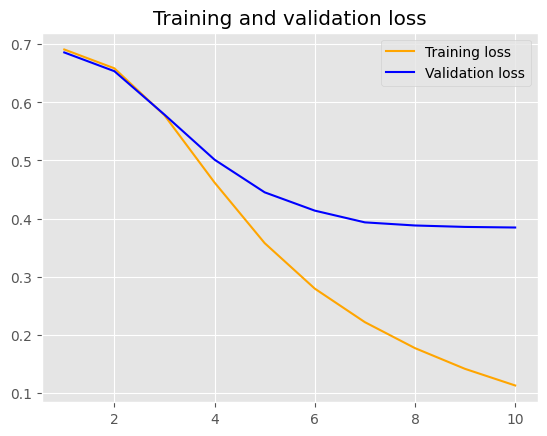

In [ ]:
# Displaying the accuracy and loss curves
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'orange', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'orange', label='Training loss')
plt.plot(epochs, validation_loss2, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the training model on the test data
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 2s 2ms/step - loss: 0.3604 - acc: 0.8382
Test loss: 0.3604184687137604
Test accuracy: 0.83815997838974


custom-trained embedding layer with training sample size = 1000

In [ ]:
features = 10000 # No. of words considered as features
length = 150 # cutting off the text upto text 150 words

# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Padding sequences
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combining both texts and labels
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

# Reducing the training size to 1000 samples
x_train = x_train[:1000]
y_train = y_train[:1000]

# Initializing the model and adding the layers
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))

# Compiling the model
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the NN model
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 0.6922 - acc: 0.5288 - val_loss: 0.6918 - val_acc: 0.5200
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6749 - acc: 0.7950 - val_loss: 0.6903 - val_acc: 0.5400
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6570 - acc: 0.8800 - val_loss: 0.6883 - val_acc: 0.5650
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6348 - acc: 0.9300 - val_loss: 0.6856 - val_acc: 0.5800
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6074 - acc: 0.9450 - val_loss: 0.6827 - val_acc: 0.5950
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5749 - acc: 0.9538 - val_loss: 0.6790 - val_acc: 0.6100
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5374 - acc: 0.9613 - val_loss: 0.6744 - val_acc: 0.6050
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4964 - acc: 0.9

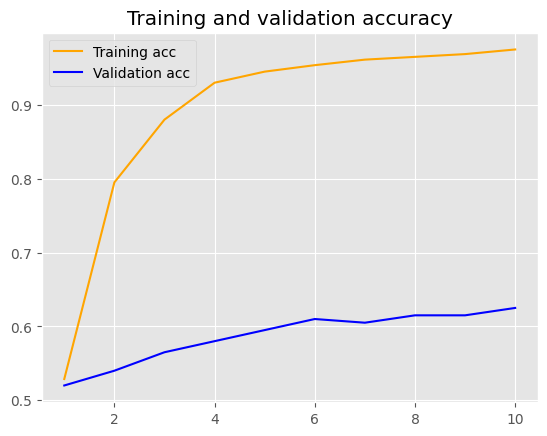

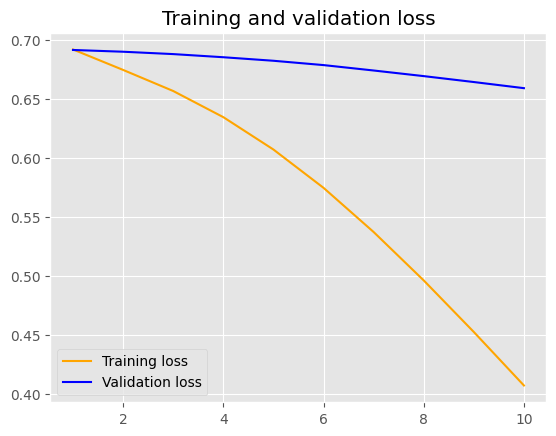

In [ ]:
# Displaying the accuracy and loss curves
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "orange", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "blue", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "orange", label = "Training loss")
plt.plot(epochs, validation_loss3, "blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
# Evaluating the model on test dataset
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 1s 2ms/step - loss: 0.6755 - acc: 0.5787
Test loss: 0.6754664778709412
Test accuracy: 0.578719973564148


custom-trained embedding layer with training sample size = 10000

In [ ]:
features = 10000 # No. of words considered as features
length = 150 # cutting off the text upto text 150 words

# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# sequence the data
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combining the text and labels
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)


x_train = x_train[:10000]
y_train = y_train[:10000]

# Initializing the model and adding layers
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))

# Compiling the model
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# Summarizing the model
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.6866 - acc: 0.5702 - val_loss: 0.6640 - val_acc: 0.7080
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5779 - acc: 0.7826 - val_loss: 0.5014 - val_acc: 0.8050
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4034 - acc: 0.8584 - val_loss: 0.3816 - val_acc: 0.8475
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2996 - acc: 0.8940 - val_loss: 0.3342 - val_acc: 0.8550
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2393 - acc: 0.9172 - val_loss: 0.3176 - val_acc: 0.8655
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1971 - acc: 0.9346 - val_loss: 0.3089 - val_acc: 0.8660
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1634 - acc: 0.9494 - val_loss: 0.3071 - val_acc: 0.8700
Epoch 8/10
250/250 [==============================] - 2s 7ms/step - loss: 0.

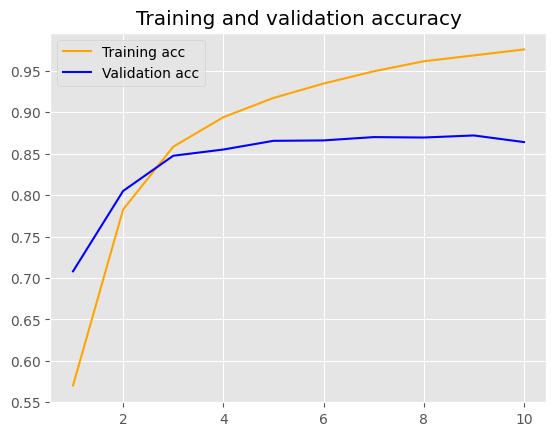

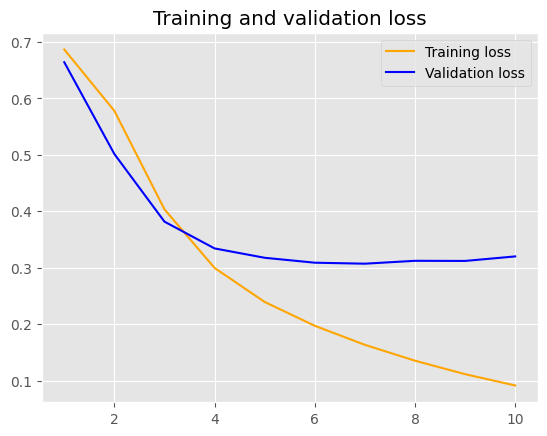

In [ ]:
# Displaying the accuracy and loss curves
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "orange", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "blue", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "orange", label = "Training loss")
plt.plot(epochs, validation_loss4, "blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
# Evaluating the model on test data
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 2s 2ms/step - loss: 0.3346 - acc: 0.8577
Test loss: 0.33464840054512024
Test accuracy: 0.8577200174331665


In [ ]:
# Downloading the data
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7064k      0  0:00:11  0:00:11 --:--:-- 11.5M


In [ ]:
# Importing libraries
import os
import shutil

# setting up the directory
imdb = 'aclImdb'
training = os.path.join(imdb, 'train')


labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Tokenizing the data

In [ ]:

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considering top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [ ]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


Preparing the GloVe word embeddings matrix

In [ ]:
# pretrained word embedding layer with training sample size = 100

embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# training the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 3s 661ms/step - loss: 2.9124 - acc: 0.6000 - val_loss: 4.0487 - val_acc: 0.4963
Epoch 2/10
4/4 [==============================] - 3s 873ms/step - loss: 1.5918 - acc: 0.6100 - val_loss: 1.8895 - val_acc: 0.4964
Epoch 3/10
4/4 [==============================] - 3s 873ms/step - loss: 0.4683 - acc: 0.8100 - val_loss: 1.5524 - val_acc: 0.4964
Epoch 4/10
4/4 [==============================] - 2s 641ms/step - loss: 0.1480 - acc: 0.9500 - val_loss: 1.3685 - val_acc: 0.4972
Epoch 5/10
4/4 [==============================] - 2s 547ms/step - loss: 0.0533 - acc: 0.9900 - val_loss: 0.7849 - val_acc: 0.5443
Epoch 6/10
4/4 [==============================] - 3s 873ms/step - loss: 0.0166 - acc: 1.0000 - val_loss: 0.9305 - val_acc: 0.5299
Epoch 7/10
4/4 [==============================] - 1s 440ms/step - loss: 0.0155 - acc: 1.0000 - val_loss: 0.8013 - val_acc: 0.5475
Epoch 8/10
4/4 [==============================] - 1s 436ms/step - loss: 0.0083 - acc: 1.00

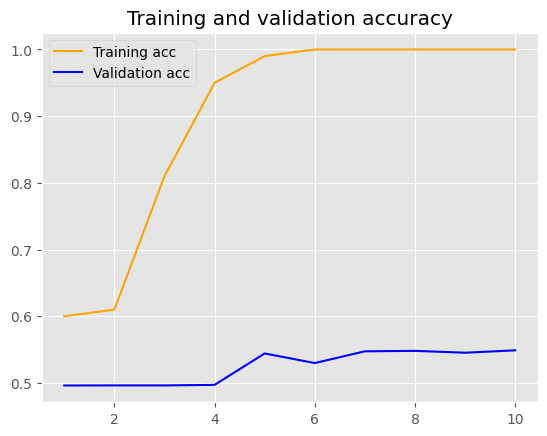

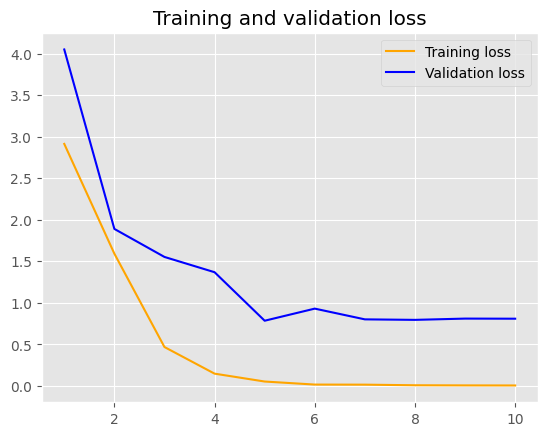

In [ ]:
# Displaying the curves
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'orange', label='Training acc')
plt.plot(epochs, valid_accuracy, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'orange', label='Training loss')
plt.plot(epochs, valid_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model on test data
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.8550 - acc: 0.5038
Test loss: 0.854981005191803
Test accuracy: 0.5037599802017212


pretrained word embedding layer with training sample size = 5000

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000
valid_data = 10000
words = 10000

# Tokenizing the data
tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]
embedd_di = 100



Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
# Embedding word matrix
embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Training the model
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.h5')


Epoch 1/10
157/157 [==============================] - 7s 34ms/step - loss: 0.7849 - acc: 0.4870 - val_loss: 0.6957 - val_acc: 0.4929
Epoch 2/10
157/157 [==============================] - 5s 32ms/step - loss: 0.7137 - acc: 0.5462 - val_loss: 0.7789 - val_acc: 0.4924
Epoch 3/10
157/157 [==============================] - 4s 25ms/step - loss: 0.6611 - acc: 0.6254 - val_loss: 0.8356 - val_acc: 0.5085
Epoch 4/10
157/157 [==============================] - 4s 26ms/step - loss: 0.5725 - acc: 0.7126 - val_loss: 0.8574 - val_acc: 0.5094
Epoch 5/10
157/157 [==============================] - 5s 30ms/step - loss: 0.4803 - acc: 0.7734 - val_loss: 1.0442 - val_acc: 0.5051
Epoch 6/10
157/157 [==============================] - 4s 23ms/step - loss: 0.3955 - acc: 0.8292 - val_loss: 1.1217 - val_acc: 0.4908
Epoch 7/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2945 - acc: 0.8848 - val_loss: 1.0212 - val_acc: 0.4895
Epoch 8/10
157/157 [==============================] - 4s 22ms/step - 

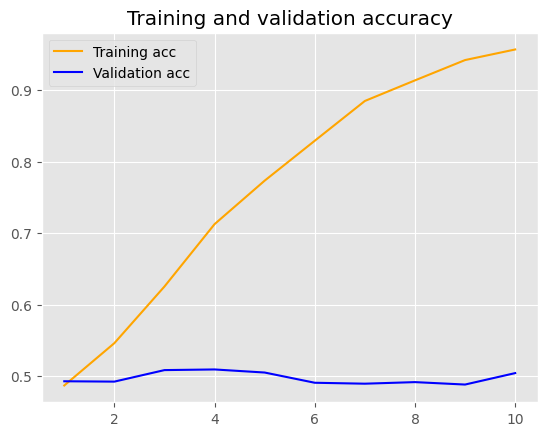

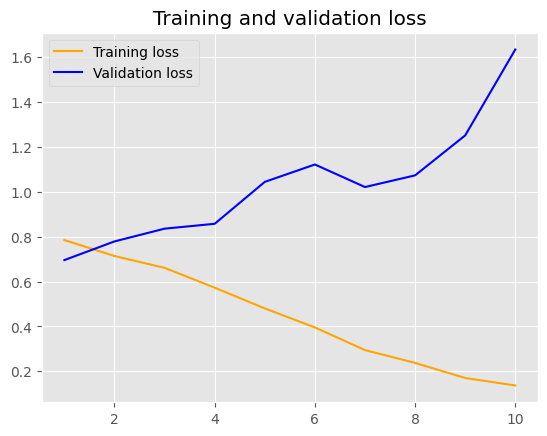

In [ ]:
# Displaying the accuracy and loss curves
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'orange', label='Training acc')
plt.plot(epochs, valid_acc11, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'orange', label='Training loss')
plt.plot(epochs, valid_loss11, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model on test data
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 3s 4ms/step - loss: 1.6342 - acc: 0.5016
Test loss: 1.6341862678527832
Test accuracy: 0.5016000270843506


pretrained word embedding layer with training sample size = 1000

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling and training the model
model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
32/32 [==============================] - 10s 222ms/step - loss: 1.0533 - acc: 0.4920 - val_loss: 0.8127 - val_acc: 0.4985
Epoch 2/10
32/32 [==============================] - 6s 188ms/step - loss: 0.6420 - acc: 0.6400 - val_loss: 0.8812 - val_acc: 0.4986
Epoch 3/10
32/32 [==============================] - 3s 101ms/step - loss: 0.5472 - acc: 0.7180 - val_loss: 1.1745 - val_acc: 0.5017
Epoch 4/10
32/32 [==============================] - 6s 194ms/step - loss: 0.4742 - acc: 0.7810 - val_loss: 0.7470 - val_acc: 0.4945
Epoch 5/10
32/32 [==============================] - 4s 121ms/step - loss: 0.3384 - acc: 0.8840 - val_loss: 1.1755 - val_acc: 0.4982
Epoch 6/10
32/32 [==============================] - 2s 73ms/step - loss: 0.2733 - acc: 0.9150 - val_loss: 0.8162 - val_acc: 0.4947
Epoch 7/10
32/32 [==============================] - 2s 78ms/step - loss: 0.2064 - acc: 0.9380 - val_loss: 0.8301 - val_acc: 0.4945
Epoch 8/10
32/32 [==============================] - 3s 83ms/step - loss: 0.14

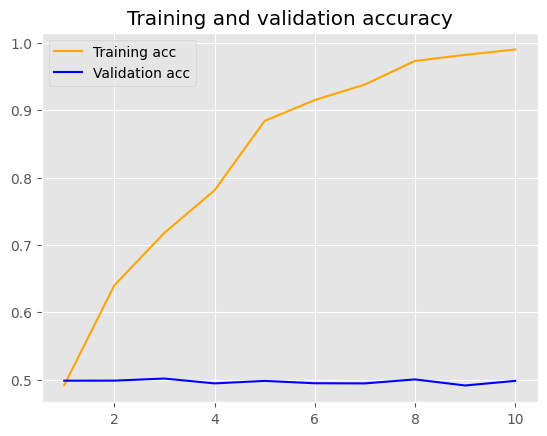

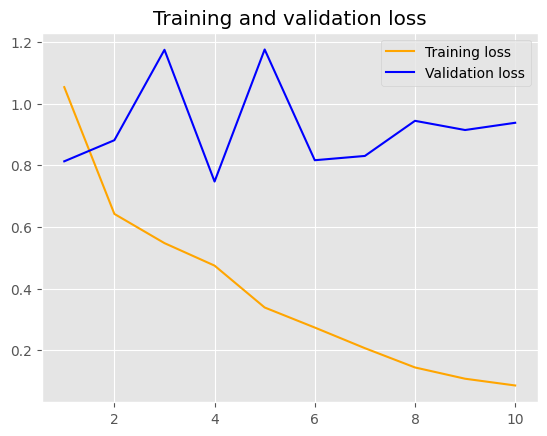

In [ ]:
# Displaying the accuracy and loss curves
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'orange', label='Training acc')
plt.plot(epochs, val_acc12, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'orange', label='Training loss')
plt.plot(epochs, val_loss12, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model on test dataset
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 [==============================] - 6s 7ms/step - loss: 0.9044 - acc: 0.5092
Test loss: 0.9043713808059692
Test accuracy: 0.5091599822044373


pretrained word embedding layer with training sample size = 10000

In [ ]:
# TOkenization of the data
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
# Embedding word matrix
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_ds]
y_train = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling and training the model
model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
313/313 [==============================] - 5s 13ms/step - loss: 0.7417 - acc: 0.5045 - val_loss: 0.6931 - val_acc: 0.4995
Epoch 2/10
313/313 [==============================] - 4s 14ms/step - loss: 0.6963 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/10
313/313 [==============================] - 7s 23ms/step - loss: 0.6953 - acc: 0.5064 - val_loss: 0.7024 - val_acc: 0.4997
Epoch 4/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6819 - acc: 0.5394 - val_loss: 0.6979 - val_acc: 0.5060
Epoch 5/10
313/313 [==============================] - 7s 22ms/step - loss: 0.6453 - acc: 0.5988 - val_loss: 0.7182 - val_acc: 0.5002
Epoch 6/10
313/313 [==============================] - 6s 21ms/step - loss: 0.5929 - acc: 0.6605 - val_loss: 0.7510 - val_acc: 0.5020
Epoch 7/10
313/313 [==============================] - 6s 19ms/step - loss: 0.5179 - acc: 0.7173 - val_loss: 0.8693 - val_acc: 0.5026
Epoch 8/10
313/313 [==============================] - 12s 39ms/step -

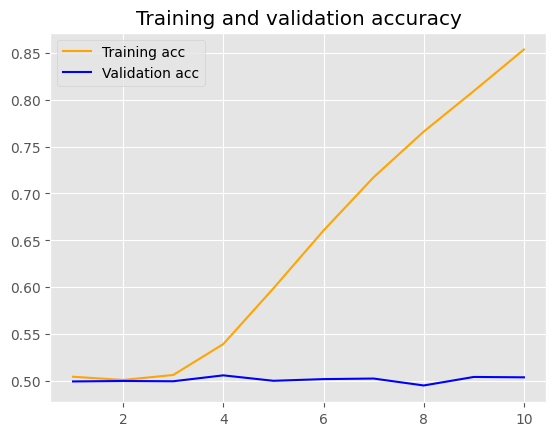

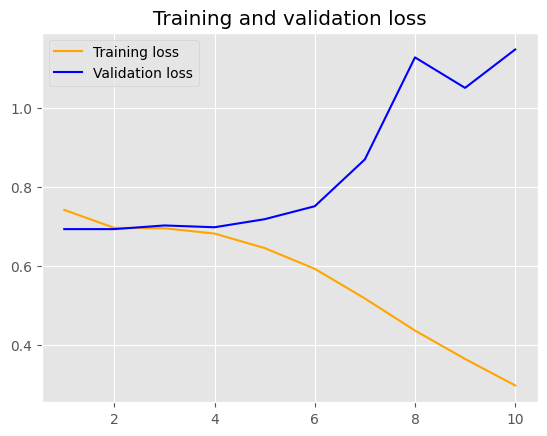

In [ ]:
# displaying the accuracy and loss curves
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'orange', label='Training acc')
plt.plot(epochs, valid_acc13, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'orange', label='Training loss')
plt.plot(epochs, valid_loss13, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model on test dataset
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 5s 6ms/step - loss: 1.1479 - acc: 0.4966
Test loss: 1.1479318141937256
Test accuracy: 0.4966000020503998
